[51 92]
0
[[ 71.  60.]
 [ 20.  82.]
 [ 86.  74.]
 [ 74.  87.]
 [ 99.  23.]
 [  2.  21.]
 [ 52.   1.]
 [ 87.  29.]
 [ 37.   1.]
 [ 63.  59.]
 [ 20.  32.]]
[[1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
[1 1 1 0 1 0 0 0 0 0 1]
[False False False  True False  True  True  True  True  True False]
[[ 74.  87.]
 [  2.  21.]
 [ 52.   1.]
 [ 87.  29.]
 [ 37.   1.]
 [ 63.  59.]]
트레인 성공시 True 반환 : True
[[ 91.  59.]]
Neighbor's label :  [[ 1.  1.  0.  0.  0.  1.  0.]]
predicted label :  [[ 0.]]
distance to neighbor :  [[  250.   401.   784.   916.  1073.  1360.  4885.]]
what is this :  0.0


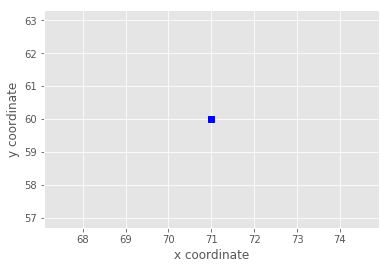

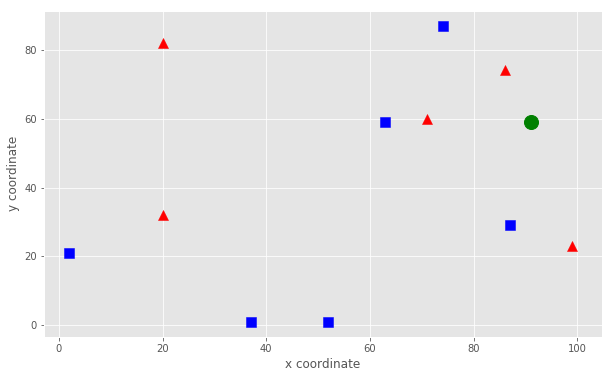

In [1]:
#분류 모델을 사용해 클래스 레이블 예측하는 방법 중 하나
#kNN K Nearest Neighbor
#KNN 알고리즘에 대한 OpenCV, 데이터 변경(munging)을 위한 NumPy, 플로팅을 위한 Matplotlib, 이미지 표시를 위한 매직 명령
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

#난수 생성
np.random.seed(42)

#x와 y가 0<100 사이라면, 다음과 같이 좌표를 랜덤으로 설정 할 수 있지.
single_data_point = np.random.randint(0,100,2)
print(single_data_point)

#마찬가지로 데이터 요소의 레이블을 아래와 같이 설정 할 수 있지.
single_label = np.random.randint(0,2)
print(single_label)
#현재 x = 51, y = 92의 데이터 포인트는 클래스 0을 가짐. -> 파란색 사각형

#생성할 데이터 포인트의 수와 데이터 포인트마다 존재하는 정보(특징)의 수를 입력으로 취하는 함수를 만들어본다.
def generate_data(num_samples, num_features=2) :
    """randomly generates a num of data points"""
    data_size = (num_samples, num_features)
    data = np.random.randint(0,100, size = data_size)
    #size에 (m,n)을 입력할 시 m*n으로 생성
    labels_size = (num_samples, 1)
    labels = np.random.randint(0,2,size = labels_size)
    
    #OpenCV는 데이터 유형에 관해서 까다로우니 항상 np.float32로 변환해야 한다.
    return data.astype(np.float32), labels

train_data, labels = generate_data(11)
print(train_data)
print(labels)

#첫 번째 데이터 포인트와 레이블을 지도 위에 그려보자
plt.plot(train_data[0,0], train_data[0,1], 'sb') #squre / blue
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')

#전체 훈련 세트를 시각화 하기 위한 함수
def plot_data(all_blue, all_red):
    plt.figure(figsize = (10,6))
    plt.scatter(all_blue[:,0], all_blue[:,1], c= 'b', marker = 's', s = 100)
    plt.scatter(all_red[:,0],all_red[:,1], c = 'r', marker = '^', s = 100)
    plt.xlabel('x coordinate')
    plt.ylabel('y coordinate')
    
#np 다차원 배열을 1차원으로 만들어주는 함수 ravel
print(labels.ravel())
print(labels.ravel() == 0)

blue = train_data[labels.ravel() == 0]
print(train_data[labels.ravel() == 0])
red = train_data[labels.ravel() == 1]

plot_data(blue,red)

knn = cv2.ml.KNearest_create()
#cv2.ml.ROW_SAMPLE = parameter in knn.train function, passing this parameter considers the length of array as 1 for entire row.
print("트레인 성공시 True 반환 :",knn.train(train_data, cv2.ml.ROW_SAMPLE, labels))

#generate_data 함수로 새로운 데이터 요소를 생성
newcomer, _ = generate_data(1)
#함수 사용시 임의의 레이블을 반환받을 수 있지만 우린 그 값에 관심이 없음
#_사용시 출력 값을 무시하도록 파이썬에 지시할 수 있다.
print(newcomer)

plt.plot(newcomer[0,0], newcomer[0,1], 'go', markersize=14);

ret, results, neighbor, dist = knn.findNearest(newcomer, 7) # 7 = k
print("Neighbor's label : ", neighbor)
print("predicted label : ", results)
print("distance to neighbor : ", dist)
print("what is this : ", ret)